In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [2]:
startdate = date.datetime(2019, 3, 20)
enddate = date.datetime(2020, 3, 20)
tag = 'ALSEA.MX'
data = pdr.get_data_yahoo(tag, start = startdate, end = enddate)

In [3]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,43.279999,42.529999,42.740002,43.110001,2518759,43.110001
2019-03-21,43.439999,42.490002,43.200001,42.650002,1649902,42.650002
2019-03-22,42.970001,42.040001,42.599998,42.340000,1582278,42.340000
2019-03-25,43.000000,42.209999,42.389999,42.520000,361170,42.520000
2019-03-26,42.540001,41.270000,42.500000,41.400002,1533104,41.400002


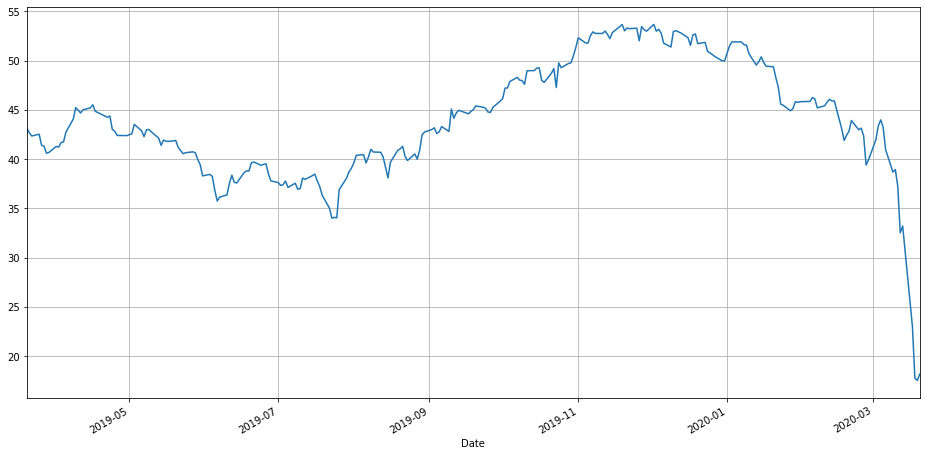

In [4]:
%matplotlib inline 
fig = plt.figure(figsize = (16,8))
data.Close.plot()
plt.grid()

In [5]:
def ROC(df, n):
    M = df['Close'].diff(n - 1)
    N = df['Close'].shift(n - 1)
    ROC = pd.Series(M/N, name = 'ROC_' + str(n))
    df = df.join(ROC)
    Cr = pd.Series(df['Close'].shift(1), name = 'Cr')
    df = df.join(Cr)
    ROCr = pd.Series(ROC.shift(1), name = 'ROC_' + str(n) + '_r')
    df = df.join(ROCr)
    df['Recomendación'] = '-'
    
    df.loc[((ROC > 0) & (ROCr < 0)), 'Recomendación'] = 'Se recomienda COMPRAR la acción.'
    df.loc[((ROC < 0) & (ROCr > 0)), 'Recomendación'] = 'Se recomienda VENDER la acción.'
    df.loc[((df['Close'] < Cr) & ((ROC > 0) & (ROCr < 0) & (ROC > ROCr))), 'Recomendación'] = 'Se recomienda COMPRAR la acción. (DIV)'
    df.loc[((df['Close'] > Cr) & ((ROC < 0) & (ROCr > 0) & (ROC < ROCr))), 'Recomendación'] = 'Se recomienda VENDER la acción. (DIV)'    
    
    return df

In [6]:
df2 = ROC(data, 10)

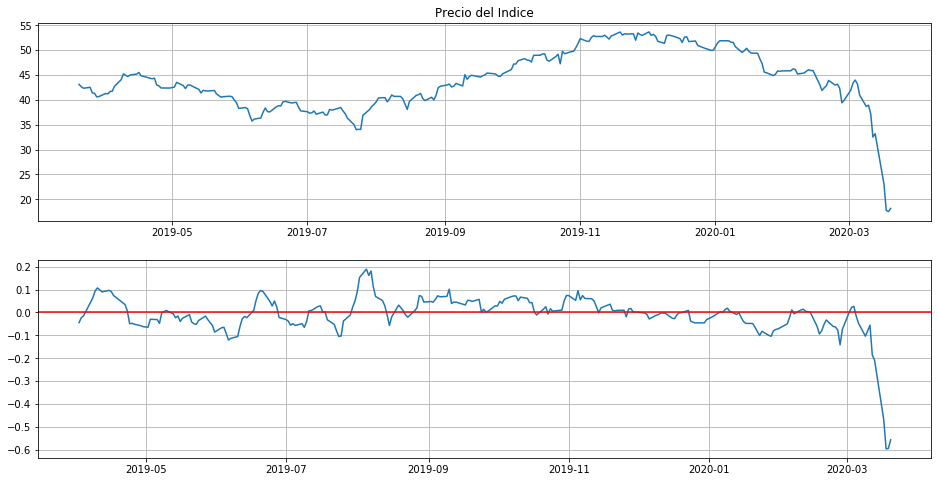

,Close,ROC_10,Recomendación
Date,,,
2019-04-05,42.750000,0.005409,Se recomienda COMPRAR la acción.
2019-04-24,43.009998,-0.048872,Se recomienda VENDER la acción.
2019-05-09,42.990002,0.003970,Se recomienda COMPRAR la acción.
2019-05-13,42.119999,-0.006135,Se recomienda VENDER la acción.
2019-06-17,38.610001,0.009940,Se recomienda COMPRAR la acción.
2019-06-28,37.779999,-0.021497,Se recomienda VENDER la acción.
2019-07-11,38.070000,0.007676,Se recomienda COMPRAR la acción.
2019-07-19,36.340000,-0.031966,Se recomienda VENDER la acción.
2019-07-30,38.680000,0.023551,Se recomienda COMPRAR la acción.


In [7]:
fig = plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
plt.plot(df2.Close)
plt.title('Precio del Indice')
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(df2.ROC_10)
plt.axhline(y=0, color= 'r')
plt.grid()
plt.show()
df2.loc[df2['Recomendación'] != '-',['Close', 'ROC_10', 'Recomendación']]
#df2[['Close', 'ROC_10', 'Recomendación']]